In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.rcParams['font.size'] = 10
import matplotlib.colors as mcolors

import seaborn as sns

import palettable.colorbrewer.sequential as palet

import time
start_time = time.time()
print(time.ctime())

from dynamic_stock_model import DynamicStockModel

#file_path = 'D:\WorkingOn\Co_Cu_Ni\\'
file_path = r'C:\Users\xmuxi\Desktop\2-UCAS\4-Co-Ni-Cu\Data\\'

Mon Nov 24 22:07:11 2025


- population (million persons)

In [2]:
#df_pop = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='Population', index_col=[0], header=2)
df_pop = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='Population', index_col=[0], header=2)
df_pop.head(2)

,China,Japan,EU,USA,RoW
Region,,,,,
1900,400.265000,44.103,278.2490,76.391,527.86193
1901,402.520077,44.662,280.5497,77.888,532.84672


In [3]:
Materials = ['Cobalt','Copper','Nickel']

IEA_Scenarios = ['STEPS','APS','NZES']

Regions = ['China','Japan','EU','USA','RoW']
Region_Colors = ['#D62728','#2CA02C','#FF7F0E','#1F77B4','#7F7F7F']

Primary_Scenarios = ['Baseline (SP)','Copper-driven','Laterite Nickel-driven','All carriers-driven']
Secondary_Scenarios = ['Constant','High']
Process_Scenarios = ['Constant','Efficient']
Lifetime_Scenarios = ['Constant','Longer']

Segment_Scenarios = ['Smaller','Baseline']
#Segment_Scenarios = ['Baseline','Smaller','Larger']

Battery_Sizes = ['Larger']
#Battery_Sizes = ['Constant','Larger']

Battery_Scenarios = ['NCX low cobalt','LFP development','Li-S/Air development','Low Cobalt/Nickel development']

Mining_Scenarios = ['Baseline (SP)','Copper-driven','Laterite Nickel-driven','All Carrier-driven']
Mining_Sources = ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']

## Demand: Bottom-up (Emerging use)

In [4]:
Year_Min = 2020

def full_fill(df):
    df_temp = pd.DataFrame(index=np.arange(Year_Min,df.index.min()), columns=df.columns)
    df_temp.fillna(value=0, inplace=True)
    df_output  = pd.concat([df_temp, df])
    
    return df_output

- ESS (kt)

In [5]:
#df_ESS_stock = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_stock', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_stock = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_stock', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_stock = df_ESS_stock.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_stock = df_ESS_stock.T
df_ESS_stock = full_fill(df_ESS_stock)

#df_ESS_inflow = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_inflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_inflow = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_inflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_inflow = df_ESS_inflow.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_inflow = df_ESS_inflow.T
df_ESS_inflow = full_fill(df_ESS_inflow)

#df_ESS_outflow = pd.read_excel(file_path + 'Sector_ESS\\5Regions\ESS_Output.xlsx', sheet_name='material_outflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_outflow = pd.read_excel(file_path + 'Sector_ESS/5Regions/ESS_Output.xlsx', sheet_name='material_outflow', index_col=[0,1,2,3,4,5], header=[0])
df_ESS_outflow = df_ESS_outflow.groupby(['Material','ESS Scenario','Battery Scenario','Lifetime','Region']).sum()
df_ESS_outflow = df_ESS_outflow.T
df_ESS_outflow = full_fill(df_ESS_outflow)

df_ESS_inflow.head(2)

C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

Material                  Cobalt                                          \
ESS Scenario                 APS                                           
Battery Scenario LFP development                                           
Lifetime                Constant                                           
Region                     China        EU     Japan       RoW       USA   
2010                    0.006481  0.006481  0.032407  0.055093  0.129630   
2011                    0.011337  0.016705  0.023884  0.011378  0.023966   

Material                                                            ...  \
ESS Scenario                                                        ...   
Battery Scenario                                                    ...   
Lifetime            Longer                                          ...   
Region               China        EU     Japan       RoW       USA  ...   
2010              0.006481  0.006481  0.032407  0.055093  0.129630  ...   
2011              0.011337  0.016705  0.023884  0.011378  0.023966  ...   

Material                 Nickel                                          \
ESS Scenario              STEPS                                           
Battery Scenario NCX low cobalt                                           
Lifetime               Constant                                           
Region                    China        EU     Japan       RoW       USA   
2010                   0.011287  0.011287  0.056435  0.095939  0.225738   
2011                   0.021213  0.031256  0.044689  0.021290  0.044843   

Material                                                            
ESS Scenario                                                        
Battery Scenario                                                    
Lifetime            Longer                                          
Region               China        EU     Japan       RoW       USA  
2010              0.011287  0.011287  0.056435  0.095939  0.225738  
2011              0.021213  0.031256  0.044689  0.021290  0.044843  

[2 rows x 450 columns]

- vehicle: battery material (kt)

In [6]:
#df_Battery_stock = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_stock', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_stock = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_stock', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_stock = df_Battery_stock.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_stock = df_Battery_stock.T
df_Battery_stock = full_fill(df_Battery_stock)

#df_Battery_inflow = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_inflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_inflow = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_inflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_inflow = df_Battery_inflow.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_inflow = df_Battery_inflow.T
df_Battery_inflow = full_fill(df_Battery_inflow)

#df_Battery_outflow = pd.read_excel(file_path + 'Sector_Vehicle\\5Regions\Vehicle_Output.xlsx', sheet_name='battery_material_outflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_outflow = pd.read_excel(file_path + 'Sector_Vehicle/5Regions/Vehicle_Output.xlsx', sheet_name='battery_material_outflow', index_col=[0,1,2,3,4,5,6,7], header=[0])
df_Battery_outflow = df_Battery_outflow.groupby(['Material','Powertrain Scenario','Segment Scenario','Battery Size','Battery Scenario','Lifetime','Region']).sum()
df_Battery_outflow = df_Battery_outflow.T
df_Battery_outflow = full_fill(df_Battery_outflow)

df_Battery_inflow.head(2)

C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_output  = pd.concat([df_temp, df])
C:\Users\xmuxi\AppData\Local\Temp\ipykernel_18896\338853164.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no l

Material                     Cobalt                                        \
Powertrain Scenario             APS                                         
Segment Scenario           Baseline                                         
Battery Size               Constant                                         
Battery Scenario    LFP development                                         
Lifetime                   Constant                                Longer   
Region                        China        EU Japan  RoW       USA  China   
2005                            0.0  0.004645   0.0  0.0  0.016326    0.0   
2006                            0.0  0.000004   0.0  0.0  0.000014    0.0   

Material                                            ...         Nickel  \
Powertrain Scenario                                 ...          STEPS   
Segment Scenario                                    ...        Smaller   
Battery Size                                        ...         Larger   
Battery Scenario                                    ... NCX low cobalt   
Lifetime                                            ...       Constant   
Region                     EU Japan  RoW       USA  ...          China   
2005                 0.004645   0.0  0.0  0.016326  ...            0.0   
2006                 0.000004   0.0  0.0  0.000014  ...            0.0   

Material                                                                   \
Powertrain Scenario                                                         
Segment Scenario                                                            
Battery Size                                                                
Battery Scenario                                                            
Lifetime                                           Longer                   
Region                     EU Japan  RoW       USA  China        EU Japan   
2005                 0.006546   0.0  0.0  0.023012    0.0  0.006546   0.0   
2006                 0.000005   0.0  0.0  0.000020    0.0  0.000005   0.0   

Material                            
Powertrain Scenario                 
Segment Scenario                    
Battery Size                        
Battery Scenario                    
Lifetime                            
Region               RoW       USA  
2005                 0.0  0.023012  
2006                 0.0  0.000020  

[2 rows x 1800 columns]

## Copper cycle

In [7]:
Cu_Sectors = ['Building & Construction','Infrastructure','Transport','Industrial Equipment','Other Products']

Cu_New_Sectors = ['Building & Construction','Infrastructure','Transport (Exclude B-EVs)','Industrial Equipment','Other Products (Exclude B-ESS)', 'B-ESS', 'B-EVs']
Cu_Old_Sectors = ['Building & Construction','Infrastructure','Transport (Exclude B-EVs)','Industrial Equipment','Other Products (Exclude B-ESS)']
Cu_Agg_Sectors = ['Building & Infrastructure','Transportation','Industrial Equipment','B-CEs','B-EVs','B-ESS',]

## 蓝色系列
Cu_sector_color_dict = {'Building & Construction': '#C6DBEF', 
                     'Infrastructure': '#9ECAE1', 
                     'Building & Infrastructure': '#C6DBEF', 
                     
                     'Transport': '#6BAED6', 
                     'Transport (Exclude B-EVs)': '#6BAED6', 
                     'Transportation': '#6BAED6', 
                     
                     'Industrial Equipment': '#3182BD',
                     
                     'Other Products':'#08519C',  
                     'Other Products (Exclude B-ESS)':'#08519C',
                     
                     'B-CEs': '#FDAE6B',
                     'B-EVs': '#F16913',
                     'B-ESS': '#8C2D04'}

Cu_New_Sector_Colors = [Cu_sector_color_dict[s] for s in Cu_New_Sectors]
Cu_Agg_Sector_Colors = [Cu_sector_color_dict[s] for s in Cu_Agg_Sectors]

- Copper per capita stock (kg/person)

In [8]:
#df_Cu_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Cu_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Cu_per_capita.head(2)

Region                   China                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.023613       0.003528                  0.000589   
1901                  0.048428       0.007235                  0.001208   

Region                                                      \
Sector Industrial Equipment Other Products (Exclude B-ESS)   
1900               0.029575                       0.001739   
1901               0.060648                       0.003566   

Region                   Japan                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.176611       0.122359                  0.040800   
1901                  0.359698       0.249200                  0.083085   

Region                                                      ...  \
Sector Industrial Equipment Other Products (Exclude B-ESS)  ...   
1900               0.119820                       0.050181  ...   
1901               0.244001                       0.102179  ...   

Region                     USA                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.587946       0.475792                  0.275047   
1901                  1.189320       0.962435                  0.556302   

Region                                                      \
Sector Industrial Equipment Other Products (Exclude B-ESS)   
1900               0.312972                       0.180419   
1901               0.633008                       0.364876   

Region                     RoW                                           \
Sector Building & Construction Infrastructure Transport (Exclude B-EVs)   
1900                  0.242349       0.046054                  0.024369   
1901                  0.494913       0.094135                  0.049824   

Region                                                      
Sector Industrial Equipment Other Products (Exclude B-ESS)  
1900               0.027089                       0.018741  
1901               0.055419                       0.038371  

[2 rows x 25 columns]

- lifetime

In [9]:
#df_Cu_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Cu_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Cu_lifetime = df_Cu_lifetime.T
df_Cu_lifetime.head(2)

Lifetime Scenario                Constant                                 \
Sector            Building & Construction Infrastructure B-EVs Transport   
1900                                 40.0           34.0   NaN      17.0   
1901                                 40.0           34.0   NaN      17.0   

Lifetime Scenario                                                       \
Sector            Transport (Exclude B-EVs) Industrial Equipment B-ESS   
1900                                   17.0                 17.0   NaN   
1901                                   17.0                 17.0   NaN   

Lifetime Scenario                                                \
Sector            Other Products Other Products (Exclude B-ESS)   
1900                        13.0                           13.0   
1901                        13.0                           13.0   

Lifetime Scenario                  Longer                                 \
Sector            Building & Construction Infrastructure B-EVs Transport   
1900                                 40.0           34.0   NaN      17.0   
1901                                 40.0           34.0   NaN      17.0   

Lifetime Scenario                                                       \
Sector            Transport (Exclude B-EVs) Industrial Equipment B-ESS   
1900                                   17.0                 17.0   NaN   
1901                                   17.0                 17.0   NaN   

Lifetime Scenario                                                
Sector            Other Products Other Products (Exclude B-ESS)  
1900                        13.0                           13.0  
1901                        13.0                           13.0

- Copper Traditional use 
- stock, inflow, outflow
- million persons * kg/person = kt

In [10]:
def cal_traditional_stock_flow(df_pop, df_capita, df_lt, Old_Sectors):
    
    df_stock = pd.DataFrame(index=df_capita.index, 
                             columns=pd.MultiIndex.from_product([Lifetime_Scenarios,Old_Sectors,Regions],names=['Lifetime','Sector','Region']))
    df_inflow = df_stock.copy()
    df_outflow = df_inflow.copy()
    
    for lt in Lifetime_Scenarios:
        for s in Old_Sectors:
            for r in Regions:
                df_stock[(lt,s,r)] = df_pop[r] * df_capita[r,s]
                ## stock-driven
                DSM = DynamicStockModel(t = list(df_stock.index), 
                                        s = list(df_stock[(lt,s,r)]), 
                                        lt = {'Type': 'Normal',
                                              'Mean': list(df_lt[(lt,s)]),    
                                              'StdDev': list(0.3 * df_lt[(lt,s)])})
                DSM.compute_stock_driven_model()
                DSM.compute_outflow_total()
                ## fill in
                df_inflow[(lt,s,r)] = DSM.i
                df_outflow[(lt,s,r)] = DSM.o
                
    ## 第二轮
    df_inflow_2 = df_inflow.mask(df_inflow<0, 0)
    df_stock_2 = pd.DataFrame(index=df_capita.index, 
                              columns=pd.MultiIndex.from_product([Lifetime_Scenarios,Old_Sectors,Regions],names=['Lifetime','Sector','Region']))
    df_outflow_2 = df_stock_2.copy()
    
    for lt in Lifetime_Scenarios:
        for s in Old_Sectors:
            for r in Regions:
                ## inflow-driven
                DSM = DynamicStockModel(t = list(df_inflow_2.index), 
                                        i = list(df_inflow_2[(lt,s,r)]), 
                                        lt = {'Type': 'Normal',
                                              'Mean': list(df_lt[(lt,s)]),    
                                              'StdDev': list(0.3 * df_lt[(lt,s)])})
                DSM.compute_s_c_inflow_driven()
                DSM.compute_stock_total()
                DSM.compute_o_c_from_s_c()
                DSM.compute_outflow_total()
                ## fill in 
                df_stock_2[(lt,s,r)] = DSM.s
                df_outflow_2[(lt,s,r)] = DSM.o
                
    return df_stock_2, df_inflow_2, df_outflow_2


df_Cu_traditional_stock, df_Cu_traditional_inflow, df_Cu_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Cu_per_capita, df_Cu_lifetime, Cu_Old_Sectors)
df_Cu_traditional_stock = df_Cu_traditional_stock.loc[Year_Min:,:]
df_Cu_traditional_inflow = df_Cu_traditional_inflow.loc[Year_Min:,:]
df_Cu_traditional_outflow = df_Cu_traditional_outflow.loc[Year_Min:,:]
df_Cu_traditional_inflow.head(2)

Lifetime                Constant                                       \
Sector   Building & Construction                                        
Region                     China       Japan          EU          USA   
2020                 2679.908532  313.520256  1618.57227   570.948282   
2021                 7106.757440  135.972393  1351.25044  1347.480006   

Lifetime                                                                   \
Sector                Infrastructure                                        
Region            RoW          China       Japan           EU         USA   
2020      3980.798951    1890.660253   87.433825   314.098298  174.972281   
2021      4292.925241    1224.407971  107.976454  1049.737657  588.815041   

Lifetime               ...               Longer                          \
Sector                 ... Industrial Equipment                           
Region            RoW  ...                China       Japan          EU   
2020      1225.447815  ...          1342.639545  106.810508  233.040469   
2021      1065.301428  ...           503.128917   99.220998  665.702596   

Lifetime                                                                     \
Sector                            Other Products (Exclude B-ESS)              
Region           USA          RoW                          China      Japan   
2020      205.366527   826.276079                    3945.819071  61.100338   
2021      479.701205  1199.180633                       0.000000  72.551118   

Lifetime                                      
Sector                                        
Region            EU         USA         RoW  
2020      427.511310  371.884684  651.157126  
2021      551.630205  332.295060  773.611195  

[2 rows x 50 columns]

- dissipation loss rate

In [11]:
#df_Cu_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Cu_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Cu_dissipation_rate

,Dissipation rate
Sector,
Building & Construction,0.002
Infrastructure,0.006
Transport,0.004
Transport (Exclude B-EVs),0.004
B-EVs,0.004
Industrial Equipment,0.000
Other Products,0.020
Other Products (Exclude B-ESS),0.020
B-ESS,0.020


- loss rate

In [12]:
#df_Cu_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Cu_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Cu_loss_rate = df_Cu_loss_rate.T
df_Cu_loss_rate = df_Cu_loss_rate.loc[Year_Min:,:]
df_Cu_loss_rate.head(2)

Scenario          Constant                                            \
Loss rate mining loss rate benefication loss rate smelting loss rate   
2020               0.06945                 0.1346             0.0129   
2021               0.06945                 0.1346             0.0129   

Scenario                                                                       \
Loss rate refining loss rate fabrication recycling rate fabrication loss rate   
2020                  0.0051                   0.182274              0.005017   
2021                  0.0051                   0.182274              0.005017   

Scenario                                                        \
Loss rate manufacturing recycling rate manufacturing loss rate   
2020                          0.164609                 0.00823   
2021                          0.164609                 0.00823   

Scenario                                                Efficient  \
Loss rate efficiency for recycling EoL loss rate mining loss rate   
2020                         0.014         0.017         0.069450   
2021                         0.014         0.017         0.068755   

Scenario                                                                \
Loss rate benefication loss rate smelting loss rate refining loss rate   
2020                    0.134600           0.012900           0.005100   
2021                    0.133254           0.012771           0.005049   

Scenario                                                    \
Loss rate fabrication recycling rate fabrication loss rate   
2020                        0.182274              0.005017   
2021                        0.180452              0.004967   

Scenario                                                        \
Loss rate manufacturing recycling rate manufacturing loss rate   
2020                          0.164609                0.008230   
2021                          0.162963                0.008148   

Scenario                                          
Loss rate efficiency for recycling EoL loss rate  
2020                       0.01400       0.01700  
2021                       0.01386       0.01683

- collection rate

In [13]:
#df_Cu_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Cu_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Cu_collection_rate = df_Cu_collection_rate.T
df_Cu_collection_rate = df_Cu_collection_rate.loc[Year_Min:,:]
df_Cu_collection_rate.head(2)

Scenario                Constant                           \
Sector   Building & Construction Infrastructure Transport   
2020                        0.55           0.55       0.4   
2021                        0.55           0.55       0.4   

Scenario                                                                      \
Sector   Transport (Exclude B-EVs) B-EVs Industrial Equipment Other Products   
2020                           0.4   0.4                0.325            0.3   
2021                           0.4   0.4                0.325            0.3   

Scenario                                                         High  \
Sector   Other Products (Exclude B-ESS) B-ESS Building & Construction   
2020                                0.3   0.3                  0.5500   
2021                                0.3   0.3                  0.5555   

Scenario                                                            \
Sector   Infrastructure Transport Transport (Exclude B-EVs)  B-EVs   
2020             0.5500     0.400                     0.400  0.400   
2021             0.5555     0.404                     0.404  0.404   

Scenario                                                                     \
Sector   Industrial Equipment Other Products Other Products (Exclude B-ESS)   
2020                  0.32500          0.300                          0.300   
2021                  0.32825          0.303                          0.303   

Scenario         
Sector    B-ESS  
2020      0.300  
2021      0.303

- recycling efficiency

In [14]:
#df_Cu_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Copper_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0,1], header=2)
df_Cu_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Copper_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0,1], header=2)
df_Cu_recycling_efficiency = df_Cu_recycling_efficiency.T
df_Cu_recycling_efficiency = df_Cu_recycling_efficiency.loc[Year_Min:,:]
df_Cu_recycling_efficiency.head(2)

Scenario                Constant                           \
Sector   Building & Construction Infrastructure Transport   
2020                       0.862           0.76     0.703   
2021                       0.862           0.76     0.703   

Scenario                                                                       \
Sector   Transport (Exclude B-EVs)  B-EVs Industrial Equipment Other Products   
2020                         0.703  0.703                0.547          0.495   
2021                         0.703  0.703                0.547          0.495   

Scenario                                                          High  \
Sector   Other Products (Exclude B-ESS)  B-ESS Building & Construction   
2020                              0.495  0.495                 0.86200   
2021                              0.495  0.495                 0.87062   

Scenario                                                              \
Sector   Infrastructure Transport Transport (Exclude B-EVs)    B-EVs   
2020             0.7600   0.70300                   0.70300  0.70300   
2021             0.7676   0.71003                   0.71003  0.71003   

Scenario                                                                     \
Sector   Industrial Equipment Other Products Other Products (Exclude B-ESS)   
2020                  0.54700        0.49500                        0.49500   
2021                  0.55247        0.49995                        0.49995   

Scenario           
Sector      B-ESS  
2020      0.49500  
2021      0.49995

## Nickel cycle

In [15]:
Ni_Sectors = ['Building & Infrastructure','Transportation','Industrial Machinery','Applications & Electronics','Metal Goods & Others']
Ni_New_Sectors = ['Building & Infrastructure','Transportation (Exclude B-EVs)','Industrial Machinery','Applications & Electronics (Exclude B-ESS)','Metal Goods & Others','B-ESS','B-EVs']
Ni_Old_Sectors = ['Building & Infrastructure','Transportation (Exclude B-EVs)','Industrial Machinery','Applications & Electronics (Exclude B-ESS)','Metal Goods & Others']
Ni_Agg_Sectors = ['Building & Infrastructure','Transportation','Industrial Equipment','Metal Goods & Others','B-CEs','B-EVs','B-ESS',]

## 绿色系
Ni_sector_color_dict = {'Building & Infrastructure': '#D9F0A3', 
                        
                    'Transportation': '#ADDD8E', 
                    'Transportation (Exclude B-EVs)': '#ADDD8E', 
                        
                    'Industrial Machinery': '#78C679', 
                    'Industrial Equipment': '#78C679', 
                        
                    'Applications & Electronics':'#31A354', 
                    'Applications & Electronics (Exclude B-ESS)':'#31A354', 
                        
                    'Metal Goods & Others':'#006837', 
                        
                    'Power Plant': '#BCBDDC',
                     
                    'B-CEs': '#FDAE6B',
                    'B-EVs': '#F16913',
                    'B-ESS': '#8C2D04',}

Ni_New_Sector_Colors = [Ni_sector_color_dict[s] for s in Ni_New_Sectors]
Ni_Agg_Sector_Colors = [Ni_sector_color_dict[s] for s in Ni_Agg_Sectors]

- Nickel per capita (kg/person)

In [16]:
#df_Ni_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Ni_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Ni_per_capita.head(2)

Region                     China                                 \
Sector Building & Infrastructure Transportation (Exclude B-EVs)   
1900                    0.000070                       0.000061   
1901                    0.000156                       0.000135   

Region                                                                  \
Sector Industrial Machinery Applications & Electronics (Exclude B-ESS)   
1900               0.000158                                   0.000092   
1901               0.000349                                   0.000205   

Region                                          Japan  \
Sector Metal Goods & Others Building & Infrastructure   
1900               0.000093                  0.001285   
1901               0.000207                  0.002825   

Region                                                      \
Sector Transportation (Exclude B-EVs) Industrial Machinery   
1900                         0.000771             0.001370   
1901                         0.001695             0.003014   

Region                                                                  ...  \
Sector Applications & Electronics (Exclude B-ESS) Metal Goods & Others  ...   
1900                                     0.002141             0.000767  ...   
1901                                     0.004708             0.001686  ...   

Region                       USA                                 \
Sector Building & Infrastructure Transportation (Exclude B-EVs)   
1900                    0.003227                       0.011697   
1901                    0.007048                       0.025545   

Region                                                                  \
Sector Industrial Machinery Applications & Electronics (Exclude B-ESS)   
1900               0.010488                                   0.006857   
1901               0.022906                                   0.014975   

Region                                            RoW  \
Sector Metal Goods & Others Building & Infrastructure   
1900               0.008027                  0.000942   
1901               0.017530                  0.002079   

Region                                                      \
Sector Transportation (Exclude B-EVs) Industrial Machinery   
1900                         0.000895             0.001088   
1901                         0.001973             0.002401   

Region                                                                  
Sector Applications & Electronics (Exclude B-ESS) Metal Goods & Others  
1900                                     0.000713             0.000780  
1901                                     0.001572             0.001721  

[2 rows x 25 columns]

- lifetime

In [17]:
#df_Ni_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Ni_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=2)
df_Ni_lifetime = df_Ni_lifetime.T
df_Ni_lifetime.head(2)

Scenario                  Constant                 \
Sector   Building & Infrastructure Transportation   
1900                          50.0           18.0   
1901                          50.0           18.0   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
1900                               18.0   NaN                 25.0   
1901                               18.0   NaN                 25.0   

Scenario                             \
Sector   Applications & Electronics   
1900                           15.0   
1901                           15.0   

Scenario                                                   \
Sector   Applications & Electronics (Exclude B-ESS) B-ESS   
1900                                           15.0   NaN   
1901                                           15.0   NaN   

Scenario                                         Longer                 \
Sector   Metal Goods & Others Building & Infrastructure Transportation   
1900                     15.0                      50.0           18.0   
1901                     15.0                      50.0           18.0   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
1900                               18.0   NaN                 25.0   
1901                               18.0   NaN                 25.0   

Scenario                             \
Sector   Applications & Electronics   
1900                           15.0   
1901                           15.0   

Scenario                                                                        
Sector   Applications & Electronics (Exclude B-ESS) B-ESS Metal Goods & Others  
1900                                           15.0   NaN                 15.0  
1901                                           15.0   NaN                 15.0

- Nickel Traditional use 
- stock, inflow, outflow
- million persons * kg/person = kt

In [18]:
df_Ni_traditional_stock, df_Ni_traditional_inflow, df_Ni_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Ni_per_capita, df_Ni_lifetime, Ni_Old_Sectors)
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock = df_Ni_traditional_stock.loc[Year_Min:,:]
df_Ni_traditional_stock.head(2)

Lifetime                  Constant                                       \
Sector   Building & Infrastructure                                        
Region                       China       Japan           EU         USA   
2020                   1351.903187  923.631007  3280.575827  568.916347   
2021                   1457.494621  914.620280  3366.887308  627.970819   

Lifetime                                                                       \
Sector                Transportation (Exclude B-EVs)                            
Region            RoW                          China       Japan           EU   
2020      3741.687002                    1529.910007  252.104938  1013.020565   
2021      4072.264412                    1562.057866  248.462270  1035.991551   

Lifetime                           ...  \
Sector                             ...   
Region           USA          RoW  ...   
2020      830.772233  2529.486540  ...   
2021      837.056772  2612.738156  ...   

Lifetime                                     Longer                          \
Sector   Applications & Electronics (Exclude B-ESS)                           
Region                                        China       Japan          EU   
2020                                    1721.021133  580.036325  595.008398   
2021                                    1779.310995  547.921563  643.557551   

Lifetime                                                            \
Sector                            Metal Goods & Others               
Region           USA          RoW                China       Japan   
2020      398.391066  1790.854517          4691.593541  208.297027   
2021      429.760213  1875.345130          4611.141206  216.696012   

Lifetime                                       
Sector                                         
Region            EU         USA          RoW  
2020      548.834151  442.777698  2138.302852  
2021      602.682523  481.643157  2216.854769  

[2 rows x 50 columns]

- dissipation loss rate

In [19]:
#df_Ni_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Ni_dissipation_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='dissipation', index_col=[0], header=2)
df_Ni_dissipation_rate.fillna(0, inplace=True)
df_Ni_dissipation_rate

,Dissipation rate
Sector,
Building & Infrastructure,0.0001
Transportation,0.0001
Transportation (Exclude B-EVs),0.0001
B-EVs,0.0001
Industrial Machinery,0.0000
Applications & Electronics,0.0000
Applications & Electronics (Exclude B-ESS),0.0000
B-ESS,0.0000
Metal Goods & Others,0.0050


- loss rate

In [20]:
#df_Ni_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Ni_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1], header=2)
df_Ni_loss_rate = df_Ni_loss_rate.T
df_Ni_loss_rate = df_Ni_loss_rate.loc[Year_Min:,:]
df_Ni_loss_rate.head(2)

Scenario          Constant                                        \
Loss rate mining loss rate smelting loss rate refining loss rate   
2020              0.143398           0.056408           0.043997   
2021              0.143398           0.056408           0.043997   

Scenario                                                    \
Loss rate fabrication loss rate fabrication recycling rate   
2020                     0.0008                     0.0042   
2021                     0.0008                     0.0042   

Scenario                                                        \
Loss rate manufacturing loss rate manufacturing recycling rate   
2020                     0.008131                     0.042689   
2021                     0.008131                     0.042689   

Scenario         Efficient                                        \
Loss rate mining loss rate smelting loss rate refining loss rate   
2020              0.143398           0.056408           0.043997   
2021              0.136228           0.053588           0.041797   

Scenario                                                    \
Loss rate fabrication loss rate fabrication recycling rate   
2020                    0.00080                     0.0042   
2021                    0.00076                     0.0042   

Scenario                                                        
Loss rate manufacturing loss rate manufacturing recycling rate  
2020                     0.008131                     0.042689  
2021                     0.007725                     0.042689

- collection rate

In [21]:
#df_Ni_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Ni_collection_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='collection rate', index_col=[0,1], header=2)
df_Ni_collection_rate = df_Ni_collection_rate.T
df_Ni_collection_rate = df_Ni_collection_rate.loc[Year_Min:,:]
df_Ni_collection_rate.head(2)

Scenario                  Constant                 \
Sector   Building & Infrastructure Transportation   
2020                          0.87           0.74   
2021                          0.87           0.74   

Scenario                                                            \
Sector   Transportation (Exclude B-EVs) B-EVs Industrial Machinery   
2020                               0.74  0.74                 0.87   
2021                               0.74  0.74                 0.87   

Scenario                             \
Sector   Applications & Electronics   
2020                           0.39   
2021                           0.39   

Scenario                                                   \
Sector   Applications & Electronics (Exclude B-ESS) B-ESS   
2020                                           0.39  0.39   
2021                                           0.39  0.39   

Scenario                                           High                 \
Sector   Metal Goods & Others Building & Infrastructure Transportation   
2020                     0.29                    0.8700         0.7400   
2021                     0.29                    0.8787         0.7474   

Scenario                                                              \
Sector   Transportation (Exclude B-EVs)   B-EVs Industrial Machinery   
2020                             0.7400  0.7400               0.8700   
2021                             0.7474  0.7474               0.8787   

Scenario                             \
Sector   Applications & Electronics   
2020                         0.3900   
2021                         0.3939   

Scenario                                                     \
Sector   Applications & Electronics (Exclude B-ESS)   B-ESS   
2020                                         0.3900  0.3900   
2021                                         0.3939  0.3939   

Scenario                       
Sector   Metal Goods & Others  
2020                   0.2900  
2021                   0.2929

- recycling efficiency

In [22]:
#df_Ni_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Nickel_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0], header=2)
df_Ni_recycling_efficiency = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Nickel_compile_data.xlsx', sheet_name='recycling efficiency', index_col=[0], header=2)
df_Ni_recycling_efficiency = df_Ni_recycling_efficiency.T
df_Ni_recycling_efficiency = df_Ni_recycling_efficiency.loc[Year_Min:,:]
df_Ni_recycling_efficiency.head(2)

Scenario,Constant,High
2020,0.84,0.8400
2021,0.84,0.8484


## Cobalt cycle

In [23]:
Co_Sectors = ['Battery','S&A','C&C','MAG','CAT','PI&E','OTH']
Co_New_Sectors = ['S&A','C&C','MAG','CAT','PI&E','OTH','B-CEs','B-ESS','B-EVs']
Co_Old_Sectors = ['S&A','C&C','MAG','CAT','PI&E','OTH','B-CEs']
Co_Agg_Sectors = ['Metal Goods & Others','B-CEs','B-EVs','B-ESS']

## 橘色系
Co_sector_color_dict = {'S&A': '#FDD0A2',
                     'C&C': '#FDAE6B',
                     'MAG': '#FD8D3C',
                     'CAT': '#F16913',
                     'PI&E': '#D94801',
                     'OTH': '#8C2D04', 
                     
                     'Metal Goods & Others':'#FDD0A2', 
                     
                     'B-CEs': '#FDAE6B',  #CBC9E2 原来的紫色
                     'B-EVs': '#F16913',  #9E9AC8
                     'B-ESS': '#8C2D04',  }  #6A51A3

Co_New_Sector_Colors = [Co_sector_color_dict[s] for s in Co_New_Sectors]
Co_Agg_Sector_Colors = [Co_sector_color_dict[s] for s in Co_Agg_Sectors]

- lifetime

In [24]:
#df_Co_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=[2])
df_Co_lifetime = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='lifetime', index_col=[0,1], header=[2])
df_Co_lifetime = df_Co_lifetime.T
df_Co_lifetime.head(2)

Lifetime Constant                                                  Longer  \
Sector    Battery B-EVs B-ESS B-CEs  S&A  C&C  MAG  CAT PI&E  OTH Battery   
1988          NaN   NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0     NaN   
1989          NaN   NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0     NaN   

Lifetime                                                  
Sector   B-EVs B-ESS B-CEs  S&A  C&C  MAG  CAT PI&E  OTH  
1988       NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0  
1989       NaN   NaN   3.0  5.0  1.0  5.0  5.5  5.0  1.0

- Cobalt per capita (kg/1000 persons)

In [25]:
#df_Co_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Co_per_capita = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='per capita traditional use', index_col=[0], header=[5,6])
df_Co_per_capita.head(2)

Region     China                                                              \
Sector     B-CEs       S&A       C&C       MAG       CAT      PI&E       OTH   
1988    1.095277  0.061929  0.337932  0.240332  0.163501  0.291692  0.219066   
1989    2.095722  0.118918  0.478514  0.459840  0.314449  0.559778  0.314087   

Region      Japan                      ...       RoW                      \
Sector      B-CEs       S&A       C&C  ...     B-CEs       S&A       C&C   
1988    16.927567  4.382129  2.490613  ...  0.155384  0.195808  0.110768   
1989    32.661502  8.603550  3.533399  ...  0.298040  0.452493  0.167033   

Region                                                            
Sector       MAG       CAT      PI&E       OTH OTH.1 OTH.2 OTH.3  
1988    0.060130  0.066654  0.085168  0.204656   NaN   NaN   NaN  
1989    0.123167  0.129424  0.183068  0.291805   NaN   NaN   NaN  

[2 rows x 38 columns]

- Cobalt Traditional use 
- stock, inflow, outflow
- million persons * kg/1000 persons = t
- from t to kt

In [26]:
df_Co_traditional_stock, df_Co_traditional_inflow, df_Co_traditional_outflow = cal_traditional_stock_flow(df_pop, df_Co_per_capita, df_Co_lifetime, Co_Old_Sectors)

df_Co_traditional_stock = df_Co_traditional_stock / 1e3  # from t to kt 
df_Co_traditional_inflow = df_Co_traditional_inflow / 1e3  # from t to kt 
df_Co_traditional_outflow = df_Co_traditional_outflow / 1e3  # from t to kt 

df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_stock = df_Co_traditional_stock.loc[Year_Min:,:]
df_Co_traditional_inflow.head(2)

Lifetime  Constant                                                    \
Sector         S&A                                               C&C   
Region       China     Japan        EU       USA       RoW     China   
1988      0.068601  0.537383  0.219835  2.100980  0.611184  0.374339   
1989      0.065393  0.523730  0.311432  1.479629  0.833556  0.350992   

Lifetime                                          ...    Longer            \
Sector                                            ...       OTH             
Region       Japan        EU       USA       RoW  ...     China     Japan   
1988      0.305425  0.182590  0.563945  0.345745  ...  0.242667  0.546020   
1989      0.282260  0.208712  0.479508  0.359596  ...  0.231906  0.521777   

Lifetime                                                                   \
Sector                                     B-CEs                            
Region          EU       USA       RoW     China     Japan        EU  USA   
1988      0.482505  1.470429  0.638801  1.213274  2.075838  0.026833  0.0   
1989      0.556455  1.276972  0.610809  1.159455  1.971891  0.034109  0.0   

Lifetime            
Sector              
Region         RoW  
1988      0.485007  
1989      0.471382  

[2 rows x 70 columns]

- loss rate

In [27]:
#df_Co_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1,2], header=[2])
df_Co_loss_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='loss rate', index_col=[0,1,2], header=[2])
df_Co_loss_rate = df_Co_loss_rate.T
df_Co_loss_rate = df_Co_loss_rate.loc[Year_Min:,:]
df_Co_loss_rate.head(2)

Scenario  Constant                                                             \
Stage       Mining Refining Manufacturing                                       
Loss rate      All      All       Battery B-EVs B-ESS B-CEs   S&A   C&C   MAG   
2020          0.35      0.1          0.01  0.01  0.01  0.01  0.16  0.01  0.02   
2021          0.35      0.1          0.01  0.01  0.01  0.01  0.16  0.01  0.02   

Scenario         ...     Efficient                                          \
Stage            ... Manufacturing                                           
Loss rate   CAT  ...       Battery   B-EVs   B-ESS   B-CEs     S&A     C&C   
2020       0.05  ...        0.0100  0.0100  0.0100  0.0100  0.1600  0.0100   
2021       0.05  ...        0.0099  0.0099  0.0099  0.0099  0.1584  0.0099   

Scenario                                   
Stage                                      
Loss rate     MAG     CAT    PI&E     OTH  
2020       0.0200  0.0500  0.0100  0.0100  
2021       0.0198  0.0495  0.0099  0.0099  

[2 rows x 24 columns]

- recycling rate

In [28]:
#df_Co_recycling_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co\\5Regions\\by-Cobalt_compile_data.xlsx', sheet_name='recycling rate', index_col=[0,1,2], header=[2])
df_Co_recycling_rate = pd.read_excel(file_path + 'Sector_Cu_Ni_Co/5Regions/by-Cobalt_compile_data.xlsx', sheet_name='recycling rate', index_col=[0,1,2], header=[2])
df_Co_recycling_rate = df_Co_recycling_rate.T
df_Co_recycling_rate = df_Co_recycling_rate.loc[Year_Min:,:]
df_Co_recycling_rate.head(2)

Scenario                   Constant                                         \
Recycling New scrap generation rate                                          
Sector                      Battery B-EVs B-ESS B-CEs   S&A  C&C  MAG  CAT   
2020                           0.01  0.01  0.01  0.01  0.79  0.0  0.1  0.0   
2021                           0.01  0.01  0.01  0.01  0.79  0.0  0.1  0.0   

Scenario             ...               High                                    \
Recycling            ... EoL recycling rate                                     
Sector    PI&E  OTH  ...            Battery  B-EVs  B-ESS B-CEs   S&A     C&C   
2020       0.0  0.0  ...               0.20  0.500  0.300  0.20  0.80  0.4500   
2021       0.0  0.0  ...               0.21  0.525  0.315  0.21  0.84  0.4725   

Scenario                         
Recycling                        
Sector       MAG  CAT PI&E  OTH  
2020       0.100  0.0  0.0  0.0  
2021       0.105  0.0  0.0  0.0  

[2 rows x 60 columns]

## By production

In [29]:
#df_Primary_Baseline = pd.read_excel(file_path + 'Sector_Mining\Deposit_SP\Mining_Scenarios.xlsx',sheet_name='Baseline', header=1, index_col=[0])
df_Primary_Baseline = pd.read_excel(file_path + 'Sector_Mining/Deposit_SP/Mining_Scenarios.xlsx',sheet_name='Baseline', header=1, index_col=[0])
df_Primary_Baseline = df_Primary_Baseline / 1e3  ## from t to kt
df_Primary_Baseline = df_Primary_Baseline.loc[Year_Min:,:]
df_Primary_Baseline.head(2)

,Total,Cobalt_from_Cobalt,Cobalt_from_Copper,Cobalt_from_Sulfide_Nickel,Cobalt_from_Laterite_Nickel
Year,,,,,
2020,142.0,9.558318,98.341077,11.845554,22.255051
2021,165.0,8.935280,118.791329,12.879554,24.393837


In [30]:
#df_Nickel_Source = pd.read_excel(file_path + 'Sector_Mining\Deposit_SP\Mining_Scenarios.xlsx',sheet_name='Nickel', header=2, index_col=[0])
df_Nickel_Source = pd.read_excel(file_path + 'Sector_Mining/Deposit_SP/Mining_Scenarios.xlsx',sheet_name='Nickel', header=2, index_col=[0])
df_Nickel_Source = df_Nickel_Source.loc[Year_Min:,:]
df_Nickel_Source.head(2)

,Sulfide Nickel,Laterite Nickel
Year,,
2020,0.287097,0.712903
2021,0.284194,0.715806


## All Scenarios
- All inflows, outflows, stocks (kt)
### 人工测试

In [31]:
def rename_sector(row):
    
    if row.Material == 'Copper':
        if row.Sector in ['B-ESS','B-EVs','Industrial Equipment']:
            return row.Sector
        elif row.Sector in ['Building & Construction', 'Infrastructure']:
            return 'Building & Infrastructure'
        elif row.Sector == 'Transport (Exclude B-EVs)':
            return 'Transportation'
        elif row.Sector == 'Other Products (Exclude B-ESS)':
            return 'B-CEs'
        
    elif row.Material == 'Nickel':
        if row.Sector in ['B-ESS','B-EVs','Building & Infrastructure','Metal Goods & Others']:
            return row.Sector
        elif row.Sector == 'Transportation (Exclude B-EVs)':
            return 'Transportation'
        elif row.Sector == 'Industrial Machinery':
            return 'Industrial Equipment'
        elif row.Sector == 'Applications & Electronics (Exclude B-ESS)':
            return 'B-CEs'
        
    elif row.Material == 'Cobalt':
        if row.Sector in ['B-ESS','B-EVs','B-CEs']:
            return row.Sector
        else:
            return 'Metal Goods & Others'
        
        
def reconstruct_sector(df):
    df = df.copy()
    
    df = df.T.reset_index(drop=False)
    
    df.Sector = df.apply(rename_sector, axis=1)
    df = df.groupby(['Material','Sector','Region']).sum().T
    
    return df

In [32]:
def extract_all_sectors(flow, lt, d_sce, seg_sce, b_size, b_sce):
    
    ################################## Copper
    df_copper = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Copper'],Cu_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Cu_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                ## Lifetime, Sector, Region
                df_copper[('Copper',s,r)] = df_Cu_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_copper[('Copper',s,r)] = df_Cu_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_copper[('Copper',s,r)] = df_Cu_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_copper[('Copper','B-ESS',r)] = df_ESS_inflow[('Copper',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_copper[('Copper','B-ESS',r)] = df_ESS_outflow[('Copper',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_copper[('Copper','B-ESS',r)] = df_ESS_stock[('Copper',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_copper[('Copper','B-EVs',r)] = df_Battery_inflow[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_copper[('Copper','B-EVs',r)] = df_Battery_outflow[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_copper[('Copper','B-EVs',r)] = df_Battery_stock[('Copper',d_sce,seg_sce,b_size,b_sce,lt,r)]
                
    ################################## Nickel
    df_nickel = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Nickel'],Ni_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Ni_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_nickel[('Nickel',s,r)] = df_Ni_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_inflow[('Nickel',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_outflow[('Nickel',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_nickel[('Nickel','B-ESS',r)] = df_ESS_stock[('Nickel',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_inflow[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_outflow[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_nickel[('Nickel','B-EVs',r)] = df_Battery_stock[('Nickel',d_sce,seg_sce,b_size,b_sce,lt,r)]
    
    ################################## Cobalt
    df_cobalt = pd.DataFrame(index=np.arange(Year_Min, 2050+1), 
                             columns=pd.MultiIndex.from_product([['Cobalt'],Co_New_Sectors,Regions],
                                                                names=['Material','Sector','Region']))
    # fill traditional use
    for s in Co_Old_Sectors:
        for r in Regions:
            if flow == 'Inflow':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_inflow[(lt,s,r)]
            elif flow == 'Outflow':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_outflow[(lt,s,r)]
            elif flow == 'Stock':
                df_cobalt[('Cobalt',s,r)] = df_Co_traditional_stock[(lt,s,r)]
    # fill ESS
    for r in Regions:
        ## Material, ESS Scenario, Battery Scenario, Lifetime, Region
        if flow == 'Inflow':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_inflow[('Cobalt',d_sce,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_outflow[('Cobalt',d_sce,b_sce,lt,r)]
        elif flow == 'Stock':
            df_cobalt[('Cobalt','B-ESS',r)] = df_ESS_stock[('Cobalt',d_sce,b_sce,lt,r)]
    # fill battery
    for r in Regions:
        ## Material, Powertrain Scenario, Segment Scenario, Battery Size, Battery Scenario, Lifetime ,Region
        if flow == 'Inflow':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_inflow[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Outflow':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_outflow[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
        elif flow == 'Stock':
            df_cobalt[('Cobalt','B-EVs',r)] = df_Battery_stock[('Cobalt',d_sce,seg_sce,b_size,b_sce,lt,r)]
            
    ################################## 
    df_output = pd.concat([df_copper, df_nickel, df_cobalt], axis=1)
    
    return df_output


############################# 人工测试
lt='Longer'
d_sce='APS'
seg_sce='Baseline'
b_size='Larger'
b_sce='Low Cobalt/Nickel development'  # Battery_Scenarios = ['NCX low cobalt','LFP development','Li-S/Air development','Low Cobalt/Nickel development']

df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
df_all_sector_stock = extract_all_sectors(flow='Stock', lt=lt, d_sce=d_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)

df_all_sector_inflow.tail(2)

Material                  Copper                                       \
Sector   Building & Construction                                        
Region                     China       Japan           EU         USA   
2049                 1557.216524  196.749256  1387.829446  914.936422   
2050                 1664.030307  194.683637  1365.913531  910.588485   

Material                                                                  \
Sector                 Infrastructure                                      
Region             RoW          China      Japan          EU         USA   
2049      11965.949559     1047.67122  71.405955  427.460900  328.568266   
2050      10463.803302     1056.51556  71.340781  432.175575  328.144644   

Material               ...    Cobalt                                          \
Sector                 ...     B-ESS                                           
Region            RoW  ...     China     Japan        EU       USA       RoW   
2049      6317.626313  ...  1.043525  0.047921  0.539361  0.662605  2.341205   
2050      5151.388818  ...  1.066268  0.048148  0.549184  0.666632  2.400381   

Material                                                        
Sector        B-EVs                                             
Region        China     Japan         EU        USA        RoW  
2049      12.045882  1.484801  13.325848  10.348785  32.506846  
2050      12.330971  1.518251  13.432039  10.834567  34.250574  

[2 rows x 115 columns]

- Copper primary supply + secondary supply

In [33]:
def cal_world_copper_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Copper'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Copper'].T.groupby(['Sector']).sum().T
    
    df_apc = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in df_apc.columns:
        df_apc[sector] = df_inflow[sector] / (1-df_Cu_dissipation_rate.at[sector, 'Dissipation rate'])
        
    ################# 起算点
    df_world = pd.DataFrame(index=df_apc.index)
    df_world['P5_P6'] = df_apc.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P6_P7'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Cu_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Cu_collection_rate[secondary_sce,sector] * df_Cu_recycling_efficiency[secondary_sce,sector]
    df_world['P7_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_world['P4_P5'] = df_world['P5_P6'] / (1 - df_Cu_loss_rate[process_sce,'manufacturing loss rate'])
    df_world['P3_P4'] = df_world['P4_P5'] / (1 - df_Cu_loss_rate[process_sce,'fabrication loss rate'])
    df_world['P2_P3'] = df_world['P3_P4'] / (1 - df_Cu_loss_rate[process_sce,'refining loss rate'])
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Cu_loss_rate[process_sce,'smelting loss rate']) - df_world['P7_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Cu_loss_rate[process_sce,'benefication loss rate']) / (1 - df_Cu_loss_rate[process_sce,'mining loss rate'])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P7_P2','P2_P3','P3_P4','P4_P5','P5_P6','P6_P7']]
    
    return df_world
    

cal_world_copper_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')

,L0_P1,P1_P2,P7_P2,P2_P3,P3_P4,P4_P5,P5_P6,P6_P7
2020,25376.912402,20435.976042,3721.090381,23845.440266,23723.828521,23604.812659,23410.534365,12261.224665
2021,27377.568424,22097.871303,3918.756923,25684.369867,25554.689483,25427.770708,25220.581465,12698.568886
2022,34202.720168,27669.666034,4126.325278,31393.985373,31237.062224,31083.473036,30832.733020,13145.830066
2023,37066.557746,30053.988218,4343.341519,33966.783276,33798.697803,33634.175181,33365.572658,13597.938615
2024,39580.816653,32164.011787,4570.040157,36278.855015,36101.123465,35927.150580,35643.105498,14051.382646
2025,41152.819848,33515.046480,4806.147857,37851.078676,37667.499080,37487.792975,37194.373073,14500.703516
2026,41142.644834,33579.675277,5051.267988,38161.766831,37978.531247,37799.153154,37506.254780,14939.430465
2027,41118.881160,33632.492931,5305.223325,38469.543056,38286.676803,38107.651629,37815.315649,15360.881374
2028,41338.167728,33883.794292,5567.499962,38981.689459,38798.241709,38618.638674,38325.345308,15757.181059
2029,42237.497452,34693.788129,5837.069155,40053.226564,39866.621066,39683.917825,39385.547921,16119.643340


- Nickel primary supply + secondary supply

In [34]:
def cal_world_nickel_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Nickel'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Nickel'].T.groupby(['Sector']).sum().T
    
    df_apc = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in df_apc.columns:
        df_apc[sector] = df_inflow[sector] / (1-df_Ni_dissipation_rate.at[sector, 'Dissipation rate'])
        
    ################# 起算点
    df_world = pd.DataFrame(index=df_apc.index)
    df_world['P5_P6'] = df_apc.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P6_P7'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Ni_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Ni_collection_rate[secondary_sce,sector] * df_Ni_recycling_efficiency[secondary_sce]
    df_world['P7_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_world['P4_P5'] = df_world['P5_P6'] / (1 - df_Ni_loss_rate[process_sce,'manufacturing loss rate'])
    df_world['P3_P4'] = df_world['P4_P5'] / (1 - df_Ni_loss_rate[process_sce,'fabrication loss rate'])
    df_world['P2_P3'] = df_world['P3_P4'] / (1 - df_Ni_loss_rate[process_sce,'refining loss rate'])
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Ni_loss_rate[process_sce,'smelting loss rate']) - df_world['P7_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Ni_loss_rate[process_sce,'mining loss rate'])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P7_P2','P2_P3','P3_P4','P4_P5','P5_P6','P6_P7']]
    
    return df_world


cal_world_nickel_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')

,L0_P1,P1_P2,P7_P2,P2_P3,P3_P4,P4_P5,P5_P6,P6_P7
2020,2161.083366,1851.187554,598.899488,2311.882050,2210.166820,2208.398687,2190.441871,1234.151456
2021,2658.292098,2296.157106,638.298505,2777.204629,2661.126126,2659.103670,2638.563184,1291.324211
2022,3454.480357,3007.411802,679.919958,3499.615608,3360.656228,3358.229834,3333.585932,1350.413564
2023,3904.640351,3424.579776,725.258398,3949.139643,3800.171426,3797.564888,3771.090383,1411.449639
2024,4329.360046,3823.695724,768.939681,4381.627557,4224.609285,4221.856509,4193.895700,1474.733898
2025,4794.067357,4262.122831,815.713080,4856.200625,4690.876984,4687.973215,4658.477768,1540.843354
2026,5248.402041,4695.162880,866.625182,5331.167364,5158.748705,5155.714982,5124.898548,1610.904751
2027,5807.252712,5225.711967,922.645688,5906.161873,5724.697699,5721.499483,5689.011186,1686.746805
2028,6379.503244,5772.599396,976.947036,6496.962541,6307.327095,6303.979567,6269.973573,1770.405045
2029,6984.164315,6352.958367,1038.714338,7128.889629,6931.213306,6927.718592,6892.216452,1863.284733


- Cobalt primary supply + secondary supply

In [35]:
def cal_world_cobalt_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_inflow = df_all_inflow['Cobalt'].T.groupby(['Sector']).sum().T
    df_outflow = df_all_outflow['Cobalt'].T.groupby(['Sector']).sum().T
    
    ################# 起算点
    df_world = pd.DataFrame(index=df_inflow.index)
    df_world['P3_P4'] = df_inflow.sum(axis=1)
    
    ################# 往后算
    ## Outflow
    df_world['P4_P5'] = df_outflow.sum(axis=1)
    ## Secondary supply
    df_sec = pd.DataFrame(index=df_outflow.index, columns=df_outflow.columns)
    for sector in Co_New_Sectors:
        df_sec[sector] = df_outflow[sector] * df_Co_recycling_rate[(secondary_sce,'EoL recycling rate',sector)]
    df_world['P5_P2'] = df_sec.sum(axis=1)
    
    ################ 往前算
    df_manu = pd.DataFrame(index=df_inflow.index, columns=df_inflow.columns)
    for sector in Co_New_Sectors:
        df_manu[sector] = df_inflow[sector] / (1 - df_Co_loss_rate[(process_sce,'Manufacturing',sector)])
    df_world['P2_P3'] = df_manu.sum(axis=1)
    
    df_world['P1_P2'] = df_world['P2_P3'] / (1 - df_Co_loss_rate[(process_sce,'Refining','All')]) - df_world['P5_P2']
    df_world['L0_P1'] = df_world['P1_P2'] / (1 - df_Co_loss_rate[(process_sce,'Mining','All')])
    
    df_world = df_world[[ 'L0_P1','P1_P2','P5_P2','P2_P3','P3_P4','P4_P5' ]]
    
    return df_world
    
    
cal_world_cobalt_supply(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')

,L0_P1,P1_P2,P5_P2,P2_P3,P3_P4,P4_P5
2020,192.142201,124.892431,25.329791,135.200000,131.311449,95.829604
2021,242.507956,158.478949,27.864994,167.895893,163.548650,102.574011
2022,301.234308,197.900397,30.451411,205.971047,201.275484,107.592589
2023,386.326828,255.128441,33.158852,260.314805,255.061349,112.618544
2024,429.660121,285.204691,36.791916,291.065742,285.423422,119.362303
2025,461.700319,308.024976,42.139756,316.864414,310.835862,129.263803
2026,482.683578,323.630626,49.176547,337.708117,331.345321,141.301795
2027,479.812726,323.286841,58.249252,345.974435,339.391193,155.547974
2028,497.493896,336.822948,70.351606,369.602738,362.639430,173.776038
2029,506.242310,344.380932,86.052730,391.112804,383.748149,196.417302


In [36]:
def cal_all_metal_demand(df_all_inflow, df_all_outflow, secondary_sce, process_sce):
    
    df_copper = cal_world_copper_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_copper = df_copper.loc[Year_Min:2050,['P1_P2','P7_P2']]
    df_copper.columns = ['Copper_Primary', 'Copper_Secondary']
    
    df_nickel = cal_world_nickel_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_nickel = df_nickel.loc[Year_Min:2050,['P1_P2','P7_P2']]
    df_nickel.columns = ['Nickel_Primary','Nickel_Secondary']

    df_cobalt = cal_world_cobalt_supply(df_all_inflow, df_all_outflow, secondary_sce, process_sce)
    df_cobalt = df_cobalt.loc[Year_Min:2050,['P1_P2','P5_P2']]
    df_cobalt.columns=['Cobalt_Primary','Cobalt_Secondary']
    
    df_demand = pd.concat([df_cobalt, df_copper, df_nickel], axis=1)
    
    return df_demand


## Primary supply demand 
df_supply_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')
df_supply_demand.head(2)

,Cobalt_Primary,Cobalt_Secondary,Copper_Primary,Copper_Secondary,Nickel_Primary,Nickel_Secondary
2020,124.892431,25.329791,20435.976042,3721.090381,1851.187554,598.899488
2021,158.478949,27.864994,22097.871303,3918.756923,2296.157106,638.298505


In [37]:
def cal_cobalt_primary_supply(df_base, df_carrier):
    
    df = pd.DataFrame(index=df_base.index, 
                      columns=pd.MultiIndex.from_product([Mining_Scenarios, Mining_Sources+['Total']],
                                                         names=['Mining Scenario','Mining Source']))
    
    ## Baseline
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']:
        df['Baseline (SP)',source] = df_base[source]
        
    ## Copper-driven
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel']:
        df['Copper-driven',source] = df_base[source]
    df['Copper-driven','Cobalt_from_Copper'] = df_carrier.Copper_Primary * 4.2779644619768655 / 100 * 0.09448128853944128  ## 保密处理，来自矿山尺度
    
    ## Laterite Nickel-driven
    for source in ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel']:
        df['Laterite Nickel-driven',source] = df_base[source]
    df['Laterite Nickel-driven','Cobalt_from_Laterite_Nickel'] = df_carrier.Nickel_Primary * 30.116030422282275 / 100 * 0.06539905156197441  ## 保密处理，来自矿山尺度
    
    ## All Carrier-driven
    df['All Carrier-driven','Cobalt_from_Cobalt'] = df_base.Cobalt_from_Cobalt
    df['All Carrier-driven','Cobalt_from_Copper'] = df_carrier.Copper_Primary *  4.2779644619768655 / 100 * 0.09448128853944128    ## 保密处理，来自矿山尺度
    df['All Carrier-driven','Cobalt_from_Sulfide_Nickel'] = df_carrier.Nickel_Primary * df_Nickel_Source['Sulfide Nickel'] * 26.392853608442106 / 100 * 0.04793648122672914  ## 保密处理，来自矿山尺度
    df['All Carrier-driven','Cobalt_from_Laterite_Nickel'] = df_carrier.Nickel_Primary * df_Nickel_Source['Laterite Nickel'] * 30.116030422282275 / 100 * 0.06539905156197441  ## 保密处理，来自矿山尺度

    for sce in ['Copper-driven','Laterite Nickel-driven','All Carrier-driven']:
        for source in Mining_Sources:
            for year in np.arange(Year_Min,2021):
                df.at[year, (sce, source)] = df.at[year, ('Baseline (SP)',source)]
                
    for sce in Mining_Scenarios:
        df[sce,'Total'] = df[sce,'Cobalt_from_Cobalt'] + df[sce,'Cobalt_from_Copper'] + df[sce,'Cobalt_from_Sulfide_Nickel'] + df[sce,'Cobalt_from_Laterite_Nickel']
        
    return df


## Primary supply potential
df_primary_supply_potential = cal_cobalt_primary_supply(df_Primary_Baseline, df_supply_demand)
df_primary_supply_potential.head(2)

Mining Scenario      Baseline (SP)                     \
Mining Source   Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                    
2020                      9.558318          98.341077   
2021                      8.935280         118.791329   

Mining Scenario                                                                \
Mining Source   Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel  Total   
Year                                                                            
2020                             11.845554                   22.255051  142.0   
2021                             12.879554                   24.393837  165.0   

Mining Scenario      Copper-driven                     \
Mining Source   Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                    
2020                      9.558318          98.341077   
2021                      8.935280          89.316854   

Mining Scenario                                                         \
Mining Source   Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel   
Year                                                                     
2020                             11.845554                   22.255051   
2021                             12.879554                   24.393837   

Mining Scenario             Laterite Nickel-driven                     \
Mining Source         Total     Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                                    
2020             142.000000               9.558318          98.341077   
2021             135.525525               8.935280         118.791329   

Mining Scenario                                                         \
Mining Source   Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel   
Year                                                                     
2020                             11.845554                   22.255051   
2021                             12.879554                   45.224188   

Mining Scenario             All Carrier-driven                     \
Mining Source         Total Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                                
2020             142.000000           9.558318          98.341077   
2021             185.830351           8.935280          89.316854   

Mining Scenario                                                         \
Mining Source   Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel   
Year                                                                     
2020                             11.845554                   22.255051   
2021                              8.255974                   32.371765   

Mining Scenario              
Mining Source         Total  
Year                         
2020             142.000000  
2021             138.879874

In [38]:
def max_source(df):
    
    max_Cobalt = df.xs('Cobalt_from_Cobalt', axis=1, level=1).max(axis=1)
    max_Copper = df.xs('Cobalt_from_Copper', axis=1, level=1).max(axis=1)
    max_Sulfide_Nickel = df.xs('Cobalt_from_Sulfide_Nickel', axis=1, level=1).max(axis=1)
    max_Laterite_Nickel = df.xs('Cobalt_from_Laterite_Nickel', axis=1, level=1).max(axis=1)
    max_Total = df.xs('Total', axis=1, level=1).max(axis=1)
    
    df_max = pd.concat([max_Cobalt,max_Copper,max_Sulfide_Nickel,max_Laterite_Nickel,max_Total], axis=1)
    df_max.columns = pd.MultiIndex.from_product([['MAX'], ['Cobalt_from_Cobalt','Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel','Total']])
    
    df_out = pd.concat([df, df_max], axis=1)
    
    return df_out


df_primary_supply_potential = max_source(df_primary_supply_potential)
df_primary_supply_potential.head(2)

Baseline (SP)                                                \
     Cobalt_from_Cobalt Cobalt_from_Copper Cobalt_from_Sulfide_Nickel   
Year                                                                    
2020           9.558318          98.341077                  11.845554   
2021           8.935280         118.791329                  12.879554   

                                             Copper-driven                     \
     Cobalt_from_Laterite_Nickel  Total Cobalt_from_Cobalt Cobalt_from_Copper   
Year                                                                            
2020                   22.255051  142.0           9.558318          98.341077   
2021                   24.393837  165.0           8.935280          89.316854   

                                                                         ...  \
     Cobalt_from_Sulfide_Nickel Cobalt_from_Laterite_Nickel       Total  ...   
Year                                                                     ...   
2020                  11.845554                   22.255051  142.000000  ...   
2021                  12.879554                   24.393837  135.525525  ...   

     All Carrier-driven                                                \
     Cobalt_from_Cobalt Cobalt_from_Copper Cobalt_from_Sulfide_Nickel   
Year                                                                    
2020           9.558318          98.341077                  11.845554   
2021           8.935280          89.316854                   8.255974   

                                                            MAX  \
     Cobalt_from_Laterite_Nickel       Total Cobalt_from_Cobalt   
Year                                                              
2020                   22.255051  142.000000           9.558318   
2021                   32.371765  138.879874           8.935280   

                                                    \
     Cobalt_from_Copper Cobalt_from_Sulfide_Nickel   
Year                                                 
2020          98.341077                  11.845554   
2021         118.791329                  12.879554   

                                              
     Cobalt_from_Laterite_Nickel       Total  
Year                                          
2020                   22.255051  142.000000  
2021                   45.224188  185.830351  

[2 rows x 25 columns]

In [39]:
def find_max_supply(row):
    v = 0
    
    if row.Base_Supply > row.Copper_driven_Supply:
        v = row.Base_Supply
    else:
        v = row.Copper_driven_Supply
        
    if row.Nickel_driven_Supply > v:
        v = row.Nickel_driven_Supply
        
    if row.All_driven_Supply > v:
        v = row.All_driven_Supply
    
    return v
    
    
def explore_data(df_s_demand, df_s_potential):
    
    df = pd.DataFrame(index=df_s_demand.index)
    df['Demand'] = df_s_demand.Cobalt_Primary + df_s_demand.Cobalt_Secondary
    
    #df['Base_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Baseline (SP)','Total')]
    #df['Copper_driven_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Copper-driven','Total')]
    #df['Nickel_driven_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Laterite Nickel-driven','Total')]
    #df['All_driven_Supply']  = df_s_demand.Cobalt_Secondary + df_s_potential[('All Carrier-driven','Total')]
    
    df['Base_Supply'] = df_s_potential[('Baseline (SP)','Total')]
    df['Copper_driven_Supply'] = df_s_potential[('Copper-driven','Total')]
    df['Nickel_driven_Supply'] = df_s_potential[('Laterite Nickel-driven','Total')]
    df['All_driven_Supply']  = df_s_potential[('All Carrier-driven','Total')]
    
    df['Base_Gap'] = df.Base_Supply - df.Demand
    df['Copper_driven_Gap'] = df.Copper_driven_Supply - df.Demand
    df['Nickel_driven_Gap'] = df.Nickel_driven_Supply - df.Demand
    df['All_driven_Gap'] = df.All_driven_Supply - df.Demand
    
    df['Max_Supply'] = df.apply(find_max_supply, axis=1)
    df['Min_Gap'] = df.Max_Supply - df.Demand
    
    print(df[df.Min_Gap>0].Min_Gap.sum())
    print(df[df.Min_Gap<0].Min_Gap.sum())
    
    print(df[df.Min_Gap>0].Min_Gap.sum()+df[df.Min_Gap<0].Min_Gap.sum())
    return df


df_temp = explore_data(df_supply_demand, df_primary_supply_potential)
df_temp

66.97613697943939
-4839.202600963873
-4772.226463984433


,Demand,Base_Supply,Copper_driven_Supply,Nickel_driven_Supply,All_driven_Supply,Base_Gap,Copper_driven_Gap,Nickel_driven_Gap,All_driven_Gap,Max_Supply,Min_Gap
2020,150.222222,142.000000,142.000000,142.000000,142.000000,-8.222222,-8.222222,-8.222222,-8.222222,142.000000,-8.222222
2021,186.343943,165.000000,135.525525,185.830351,138.879874,-21.343943,-50.818418,-0.513592,-47.464069,185.830351,-0.513592
2022,228.351808,197.000000,159.466081,230.560755,176.942452,-31.351808,-68.885727,2.208947,-51.409356,230.560755,2.208947
2023,288.287292,231.905560,171.240762,276.619418,196.916069,-56.381732,-117.046530,-11.667874,-91.371223,276.619418,-11.667874
2024,321.996607,293.021341,181.916440,342.715386,214.069950,-28.975267,-140.080167,20.718779,-107.926658,342.715386,20.718779
2025,350.164732,288.869319,184.613111,346.290319,224.251753,-61.295413,-165.551621,-3.874413,-125.912979,346.290319,-3.874413
2026,372.807172,304.828360,187.644920,370.344310,233.189290,-67.978813,-185.162252,-2.462862,-139.617882,370.344310,-2.462862
2027,381.536092,318.111089,188.596165,393.040185,242.283571,-63.425003,-192.939927,11.504093,-139.252522,393.040185,11.504093
2028,407.174554,335.945150,191.839003,417.719197,251.024190,-71.229403,-215.335550,10.544643,-156.150364,417.719197,10.544643
2029,430.433661,349.494977,204.280205,438.646345,268.951886,-80.938685,-226.153456,8.212683,-161.481775,438.646345,8.212683


### 动态调整情景
#### Plot supply

In [40]:
def find_max_supply(row):
    v = 0
    
    if row.Base_Supply > row.Copper_driven_Supply:
        v = row.Base_Supply
    else:
        v = row.Copper_driven_Supply
        
    if row.Nickel_driven_Supply > v:
        v = row.Nickel_driven_Supply
        
    if row.All_driven_Supply > v:
        v = row.All_driven_Supply
    
    return v


def agg_supply_demand_data(df_s_demand, df_s_potential):
    
    df = pd.DataFrame(index=df_s_demand.index)
    df['Demand'] = df_s_demand.Cobalt_Primary + df_s_demand.Cobalt_Secondary
    
    df['Base_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Baseline (SP)','Total')]
    df['Copper_driven_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Copper-driven','Total')]
    df['Nickel_driven_Supply'] = df_s_demand.Cobalt_Secondary + df_s_potential[('Laterite Nickel-driven','Total')]
    df['All_driven_Supply']  = df_s_demand.Cobalt_Secondary + df_s_potential[('All Carrier-driven','Total')]
    
    df['Base_Gap'] = df.Base_Supply - df.Demand
    df['Copper_driven_Gap'] = df.Copper_driven_Supply - df.Demand
    df['Nickel_driven_Gap'] = df.Nickel_driven_Supply - df.Demand
    df['All_driven_Gap'] = df.All_driven_Supply - df.Demand
    
    df['Max_Supply'] = df.apply(find_max_supply, axis=1)
    df['Min_Gap'] = df.Max_Supply - df.Demand
    
    return df

In [41]:
pd.concat([df_supply_demand[['Cobalt_Primary','Cobalt_Secondary']], df_primary_supply_potential['Baseline (SP)'].drop(columns=['Total'])], axis=1).tail(2)

,Cobalt_Primary,Cobalt_Secondary,Cobalt_from_Cobalt,Cobalt_from_Copper,Cobalt_from_Sulfide_Nickel,Cobalt_from_Laterite_Nickel
2049,295.315672,446.831414,6.673896,85.573180,4.244453,14.897232
2050,280.157195,462.530451,5.926226,75.986505,3.768952,13.228310


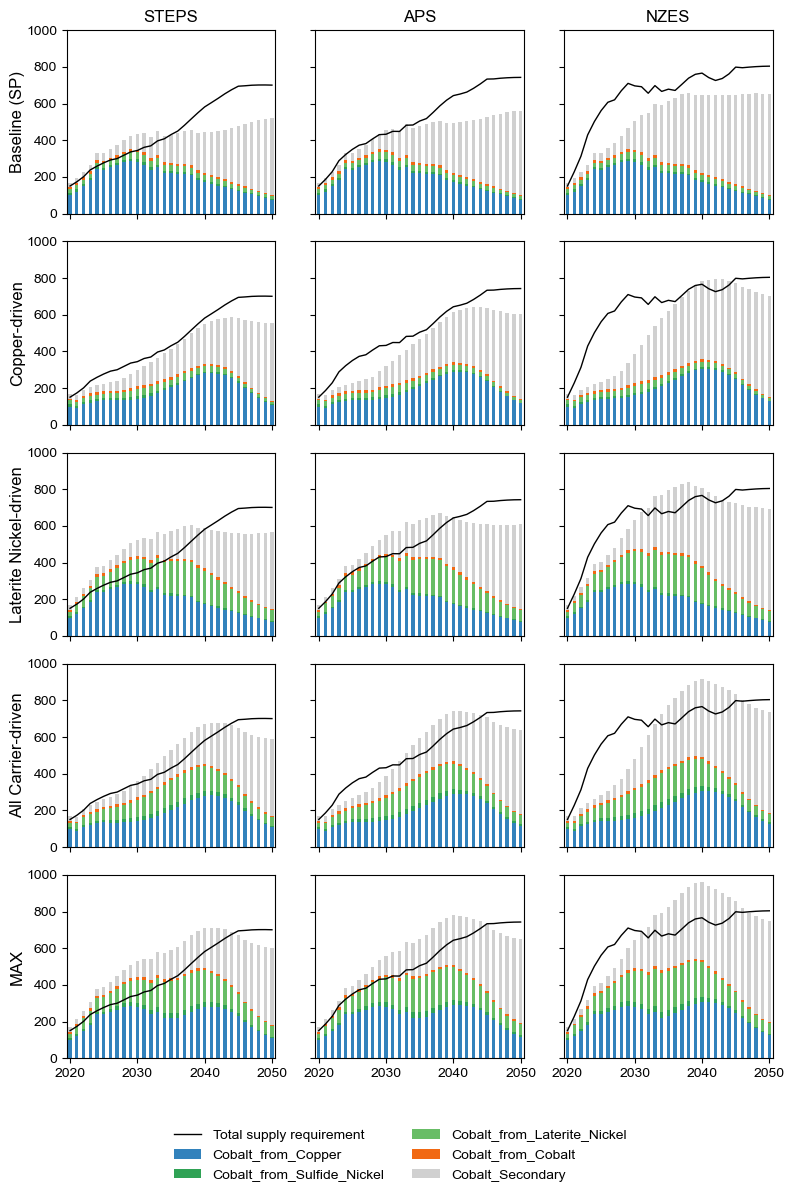

In [42]:
def plot_a_supply_source(ax, m_sce, df_s_demand, df_pri_s_p):
    
    df_plot = pd.concat([df_s_demand[['Cobalt_Primary','Cobalt_Secondary']], df_pri_s_p[m_sce].drop(columns=['Total'])], axis=1)
    df_plot = df_plot.drop(columns=['Cobalt_Primary'])
    
    Source_Names = ['Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel','Cobalt_from_Cobalt','Cobalt_Secondary']
    Source_Colors = ['#3282BC','#2FA255','#68BD66','#F16913','#D0D0D0']
    #df_plot.plot.area(ax=ax, y=Source_Names, color=Source_Colors, legend=False)
    
    df_plot['X'] = np.arange(0,2050-Year_Min+1)
    df_plot.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), y=Source_Names, color=Source_Colors, stacked=True, legend=False)
    
    ax.plot(np.arange(0,2050-Year_Min+1), (df_s_demand['Cobalt_Primary']+df_s_demand['Cobalt_Secondary']), label='Total supply requirement', lw=1, color='k', linestyle='-')
    ax.set_xticklabels([2020,2030,2040,2050], rotation=0)  # 设置刻度标签


def plot_supply_sources():
    
    fig, axes = plt.subplots(len(Mining_Scenarios+['MAX']), len(IEA_Scenarios), figsize=(8,11), sharex=True, sharey=True)
    
    for i, m_sce in enumerate(Mining_Scenarios+['MAX']):
        for j, iea_sce in enumerate(IEA_Scenarios):

            lt='Longer'
            seg_sce='Baseline'
            b_size='Larger'

            df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce='Low Cobalt/Nickel development')
            df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce='Low Cobalt/Nickel development')
            #df_all_sector_stock = extract_all_sectors(flow='Stock', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce=b_sce)
            df_s_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')            
            df_pri_s_p = cal_cobalt_primary_supply(df_Primary_Baseline, df_s_demand)
            df_pri_s_p = max_source(df_pri_s_p)

            plot_a_supply_source(axes[i,j], m_sce, df_s_demand, df_pri_s_p)
            
            axes[i,j].set_xlabel('')
            if i == 0:
                axes[i,j].set_title(iea_sce)
            #axes[i,j].set_xlim(2020,2050)
            axes[i,j].set_ylim(0,1000)
            if j == 0:
                axes[i, j].annotate(m_sce, xy=(-0.2, 0.5), xycoords='axes fraction', 
                                    ha='right', va='center', fontsize=axes[i, 0].title.get_fontsize(), rotation=90)
    
    #为最后一个子图添加 legend
    handles, labels = axes[-1,-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.02), frameon=False)
    
    #axes[0].set_ylabel('Global Co primary supply-demand balance (kt)')
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Strategy_Contribution\All_Mining_Cobalt_Sources.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Strategy_Contribution/All_Mining_Cobalt_Sources.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
    

## unit: Mt
plot_supply_sources()

#### Plot supply-demand

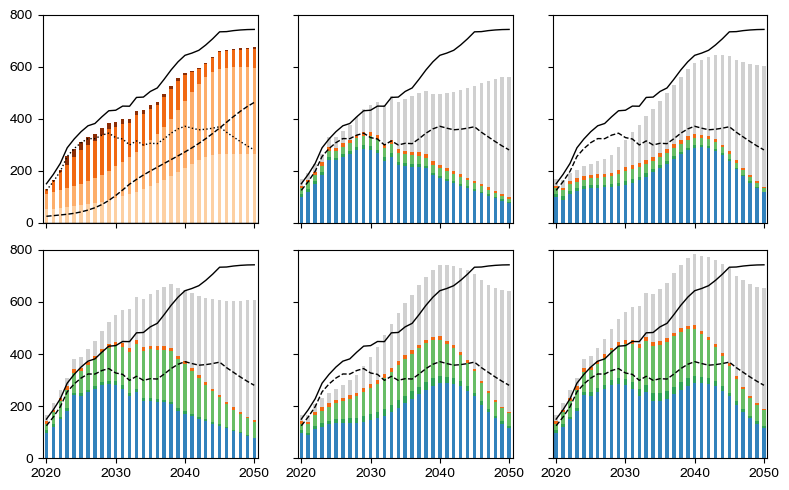

In [43]:
def plot_a_supply_source(ax, m_sce, df_s_demand, df_pri_s_p):
    
    df_plot = pd.concat([df_s_demand[['Cobalt_Primary','Cobalt_Secondary']], df_pri_s_p[m_sce].drop(columns=['Total'])], axis=1)
    df_plot = df_plot.drop(columns=['Cobalt_Primary'])
    
    Source_Names = ['Cobalt_from_Copper','Cobalt_from_Sulfide_Nickel','Cobalt_from_Laterite_Nickel','Cobalt_from_Cobalt','Cobalt_Secondary']
    Source_Colors = ['#3282BC','#2FA255','#68BD66','#F16913','#D0D0D0']
    #df_plot.plot.area(ax=ax, y=Source_Names, color=Source_Colors, legend=False)
    
    df_plot['X'] = np.arange(0,2050-Year_Min+1)
    df_plot.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), y=Source_Names, color=Source_Colors, stacked=True, legend=False)
    
    ax.plot(np.arange(0,2050-Year_Min+1), (df_s_demand['Cobalt_Primary']+df_s_demand['Cobalt_Secondary']), label='Total supply requirement', lw=1, color='k', linestyle='-')
    ax.plot(np.arange(0,2050-Year_Min+1), (df_s_demand['Cobalt_Primary']), label='Primary supply requirement', lw=1, color='k', linestyle='--')
    ax.set_xticklabels([2020,2030,2040,2050], rotation=0)  # 设置刻度标签
    
    
def plot_a_demand_source(ax, df_inflow, df_outflow):
        
    Agg_Sectors = Co_Agg_Sectors
    Agg_Sector_Colors = Co_Agg_Sector_Colors

    df_s_i = df_inflow['Cobalt'].T.groupby(['Sector']).sum().T
    df_s_o = - df_outflow['Cobalt'].T.groupby(['Sector']).sum().T
    df_s_i['X'] = np.arange(0, 2050-Year_Min+1)
    df_s_o['X'] = np.arange(0, 2050-Year_Min+1)
    
    df_s_i.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)
    #df_s_o.plot.bar(ax=ax, x='X', xticks=np.arange(0,2050-Year_Min+1,10), y=Agg_Sectors, color=Agg_Sector_Colors, stacked=True, legend=False)

    ax.set_xticklabels(np.arange(Year_Min,2051,10), rotation='horizontal')
    ax.axhline(0, color='k', lw=1)
    
    
def plot_supply_balance_for_a_scenario(ax, df_s_demand, df_pri_s_p):
    
    df_s_demand = df_s_demand.copy()
    df_s_demand.reset_index(inplace=True, drop=True)
    
    df_pri_s_p = df_pri_s_p.copy()
    df_pri_s_p.reset_index(inplace=True, drop=True)
    
    lw = 1
    ax.plot(df_s_demand.index, (df_s_demand['Cobalt_Primary']+df_s_demand['Cobalt_Secondary']), 
            label='Total supply', lw=lw, color='k', linestyle='-')  #DC3794
    ax.plot(df_s_demand.index, df_s_demand['Cobalt_Primary'], label='Primary supply', 
            lw=lw, color='k', linestyle=':')
    ax.plot(df_s_demand.index, df_s_demand['Cobalt_Secondary'], label='Secondary supply', 
            lw=lw, color='k', linestyle='--') 

def plot_supply_demand_dynamics():
    
    fig, axes = plt.subplots(2,3, figsize=(8,5), sharex=True, sharey=True)
    
    iea_sce = 'APS'
    lt='Longer'
    seg_sce='Baseline'
    b_size='Larger'

    df_all_sector_inflow = extract_all_sectors(flow='Inflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce='Low Cobalt/Nickel development')
    df_all_sector_inflow_2 = reconstruct_sector(df_all_sector_inflow)

    df_all_sector_outflow = extract_all_sectors(flow='Outflow', lt=lt, d_sce=iea_sce, seg_sce=seg_sce, b_size=b_size, b_sce='Low Cobalt/Nickel development')
    df_all_sector_outflow_2 = reconstruct_sector(df_all_sector_outflow)

    df_s_demand = cal_all_metal_demand(df_all_sector_inflow, df_all_sector_outflow, secondary_sce='High', process_sce='Efficient')            
    df_pri_s_p = cal_cobalt_primary_supply(df_Primary_Baseline, df_s_demand)
    df_pri_s_p = max_source(df_pri_s_p)
    
    # plot demand
    plot_a_demand_source(axes[0,0], df_all_sector_inflow_2, df_all_sector_outflow_2)
    plot_supply_balance_for_a_scenario(axes[0,0], df_s_demand, df_pri_s_p)

    # plot supply
    plot_a_supply_source(axes[0,1], 'Baseline (SP)', df_s_demand, df_pri_s_p)    
    plot_a_supply_source(axes[0,2], 'Copper-driven', df_s_demand, df_pri_s_p)
    plot_a_supply_source(axes[1,0], 'Laterite Nickel-driven', df_s_demand, df_pri_s_p)
    plot_a_supply_source(axes[1,1], 'All Carrier-driven', df_s_demand, df_pri_s_p)
    plot_a_supply_source(axes[1,2], 'MAX', df_s_demand, df_pri_s_p)
    
    for i in [0,1]:
        for j in [0,1,2]:
            axes[i,j].set_xlabel('')
            axes[i,j].set_ylim(0,800)
        
    plt.tight_layout()
    #plt.savefig(file_path + 'Scenarios\plot_Strategy\Strategy_Contribution\APS_Mining_Cobalt_Sources.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.savefig(file_path + 'Scenarios/plot_Strategy/Strategy_Contribution/APS_Mining_Cobalt_Sources.png', bbox_inches='tight', pad_inches=.1, dpi=500)
    plt.show()
    

## unit: kt
plot_supply_demand_dynamics()

In [44]:
end_time = time.time()
execution_time = end_time - start_time
hours = execution_time // 3600 
minutes = (execution_time % 3600) // 60 
seconds = execution_time % 60 

print(f"代码运行时间: {int(hours)}小时 {int(minutes)}分钟 {int(seconds)}秒")

代码运行时间: 0小时 1分钟 0秒
